In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(
    "/Users/gabrielmancillas/Documents/GitHub/StudentPerformancePrediction/student_performance_prediction_cleaned.csv"
)

In [2]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed,Study_Hours_Attendance,Study_Hours_Bin,Attendance_Bin,Study_Hours_Squared,Attendance_Squared
0,S00001,12.5,75.276323,75.0,Yes,Master,Yes,940.954043,Medium,Medium,156.25,5666.524865
1,S00002,9.3,95.300000,60.6,No,High School,No,886.290000,Medium,High,86.49,9082.090000
2,S00003,13.2,75.276323,64.0,No,Associate,No,993.647469,Medium,Medium,174.24,5666.524865
3,S00004,17.6,76.800000,62.4,Yes,Bachelor,No,1351.680000,High,Medium,309.76,5898.240000
4,S00005,8.8,89.300000,72.7,No,Master,No,785.840000,Medium,High,77.44,7974.490000


In [3]:
# numbers of students
df.shape

(40000, 12)

Start with the **problem statement and justification** for the project.

### 1. **Problem Statement and Justification**

#### **Problem Statement:**
The goal of this project is to analyze student performance data to identify key factors that influence academic success. Specifically, we aim to predict whether a student will pass based on variables such as study hours, attendance rate, previous grades, participation in extracurricular activities, and parent education level. The objective is to provide actionable insights and recommendations to the school board on how to improve academic outcomes for students.

#### **Justification:**
In an academic setting, student success is influenced by various factors, including study habits, attendance, family background, and extracurricular engagement. By analyzing these factors, the school board can identify areas that need attention, such as improving attendance rates or providing support for students with less study time. This data-driven approach will allow the school board to allocate resources more effectively, create targeted intervention programs, and ultimately improve the overall academic performance of students. 

Key questions include:
- Which factors are the strongest predictors of whether a student passes?
- Are there intervention points (e.g., low study hours or attendance) where school resources could make the most impact?
- How can the school board create data-driven policies to support students at risk of not passing?

---

In [4]:
# Clean unrealistic values in 'Study Hours per Week', 'Attendance Rate', and 'Previous Grades'

# Remove rows where 'Study Hours per Week' is negative
df_cleaned = df[df["Study Hours per Week"] >= 0]

# Remove rows where 'Attendance Rate' is below 0 or above 100
df_cleaned = df_cleaned[
    (df_cleaned["Attendance Rate"] >= 0) & (df_cleaned["Attendance Rate"] <= 100)
]

# Remove rows where 'Previous Grades' exceed a reasonable limit (e.g., 100)
df_cleaned = df_cleaned[df_cleaned["Previous Grades"] <= 100]

# Display cleaned data information
df_cleaned.info(), df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 34596 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   34596 non-null  object 
 1   Study Hours per Week                         34596 non-null  float64
 2   Attendance Rate                              34596 non-null  float64
 3   Previous Grades                              34596 non-null  float64
 4   Participation in Extracurricular Activities  34596 non-null  object 
 5   Parent Education Level                       34596 non-null  object 
 6   Passed                                       34596 non-null  object 
 7   Study_Hours_Attendance                       34596 non-null  float64
 8   Study_Hours_Bin                              34595 non-null  object 
 9   Attendance_Bin                               34569 non-null  object 
 10  Stu

(None,
        Study Hours per Week  Attendance Rate  Previous Grades  \
 count          34596.000000     34596.000000     34596.000000   
 mean              10.236218        71.233420        64.726608   
 std                4.595156        16.365279        14.133979   
 min               -0.000000         0.500000         8.300000   
 25%                7.000000        60.700000        55.500000   
 50%                9.962744        73.800000        65.440107   
 75%               13.300000        83.200000        74.200000   
 max               32.400000       100.000000       100.000000   
 
        Study_Hours_Attendance  Study_Hours_Squared  Attendance_Squared  
 count            34596.000000         34596.000000        34596.000000  
 mean               729.361587           125.895004         5342.014719  
 std                375.002888           103.223807         2216.094444  
 min                 -0.000000             0.000000            0.250000  
 25%                456.040

In [5]:
# Check the percentage of missing values in each column
missing_values = df_cleaned.isnull().sum() / len(df_cleaned) * 100

# Impute missing values in 'Study_Hours_Bin' and 'Attendance_Bin' with the most frequent category (mode)
if "Study_Hours_Bin" in df_cleaned.columns:
    df_cleaned["Study_Hours_Bin"].fillna(
        df_cleaned["Study_Hours_Bin"].mode()[0], inplace=True
    )
else:
    print("Column 'Study_Hours_Bin' not found in the DataFrame")

if "Attendance_Bin" in df_cleaned.columns:
    df_cleaned["Attendance_Bin"].fillna(
        df_cleaned["Attendance_Bin"].mode()[0], inplace=True
    )
else:
    print("Column 'Attendance_Bin' not found in the DataFrame")

# Verify that there are no more missing values
missing_values_after_imputation = df_cleaned.isnull().sum()

# Print the missing values before and after imputation for verification
print("Missing values before imputation:\n", missing_values)
print("Missing values after imputation:\n", missing_values_after_imputation)

Missing values before imputation:
 Student ID                                     0.000000
Study Hours per Week                           0.000000
Attendance Rate                                0.000000
Previous Grades                                0.000000
Participation in Extracurricular Activities    0.000000
Parent Education Level                         0.000000
Passed                                         0.000000
Study_Hours_Attendance                         0.000000
Study_Hours_Bin                                0.002891
Attendance_Bin                                 0.078044
Study_Hours_Squared                            0.000000
Attendance_Squared                             0.000000
dtype: float64
Missing values after imputation:
 Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0

/var/folders/jw/4t4swxld5c5f_5xhv0_bzbr00000gn/T/ipykernel_78068/1714370087.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Study_Hours_Bin'].fillna(df_cleaned['Study_Hours_Bin'].mode()[0], inplace=True)
/var/folders/jw/4t4swxld5c5f_5xhv0_bzbr00000gn/T/ipykernel_78068/1714370087.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

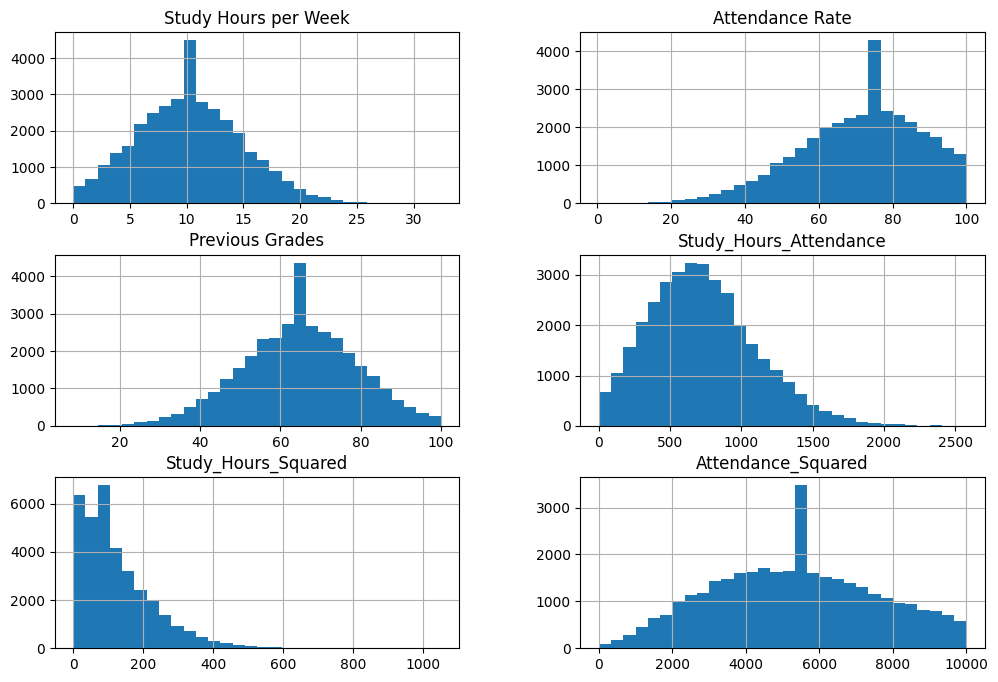

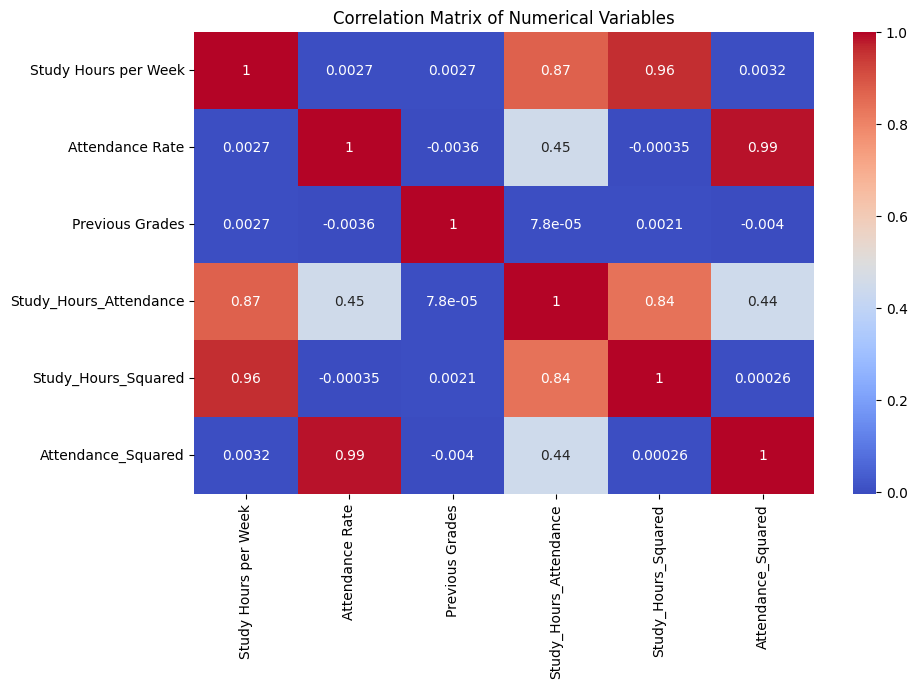

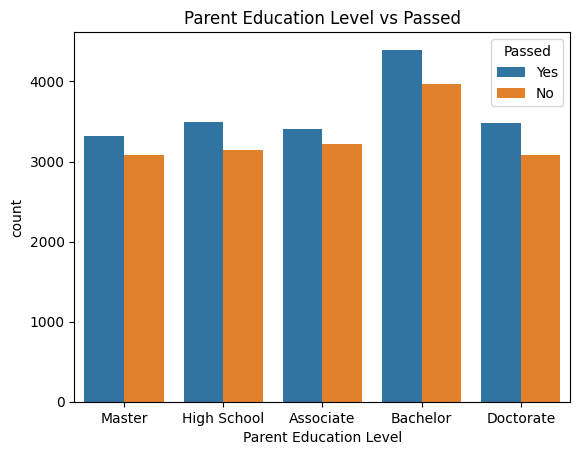

interactive(children=(IntSlider(value=0, description='study_hours_min', max=1), IntSlider(value=20, descriptio…

<function __main__.filter_data(study_hours_min=0, study_hours_max=20, attendance_min=0, attendance_max=100)>

In [6]:
from ipywidgets import interact

# Define numerical columns
numerical_cols = [
    "Study Hours per Week",
    "Attendance Rate",
    "Previous Grades",
    "Study_Hours_Attendance",
    "Study_Hours_Squared",
    "Attendance_Squared",
]

# Plot histograms for numerical variables
df_cleaned[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.show()

# Correlation matrix heatmap for numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

# Bar plot to show distribution of 'Parent Education Level' and 'Passed'
sns.countplot(data=df_cleaned, x="Parent Education Level", hue="Passed")
plt.title("Parent Education Level vs Passed")
plt.show()

# Scatter plot to show relationship between study hours and previous grades


def filter_data(
    study_hours_min=0, study_hours_max=20, attendance_min=0, attendance_max=100
):
    filtered_df = df_cleaned[
        (df_cleaned["Study Hours per Week"] >= study_hours_min)
        & (df_cleaned["Study Hours per Week"] <= study_hours_max)
        & (df_cleaned["Attendance Rate"] >= attendance_min)
        & (df_cleaned["Attendance Rate"] <= attendance_max)
    ]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=filtered_df,
        x="Study Hours per Week",
        y="Previous Grades",
        hue="Passed",
        style="Parent Education Level",
        size="Attendance Rate",
        sizes=(20, 200),
        alpha=0.6,
        palette="viridis",
    )
    plt.title("Filtered: Study Hours vs Previous Grades")
    plt.xlabel("Study Hours per Week")
    plt.ylabel("Previous Grades")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()


interact(
    filter_data,
    study_hours_min=0,
    study_hours_max=20,
    attendance_min=0,
    attendance_max=100,
)

In [7]:
# lets remove the student ID column
df_cleaned.drop("Student ID", axis=1, inplace=True)

Passed                    No   Yes
Parent Education Level            
Associate               3213  3408
Bachelor                3968  4396
Doctorate               3085  3485
High School             3140  3497
Master                  3085  3319


interactive(children=(Dropdown(description='passed', options=('Yes', 'No'), value='Yes'), Output()), _dom_clas…

interactive(children=(Dropdown(description='passed', options=('Yes', 'No'), value='Yes'), Output()), _dom_clas…

interactive(children=(IntSlider(value=0, description='attendance_min', max=1), IntSlider(value=100, descriptio…

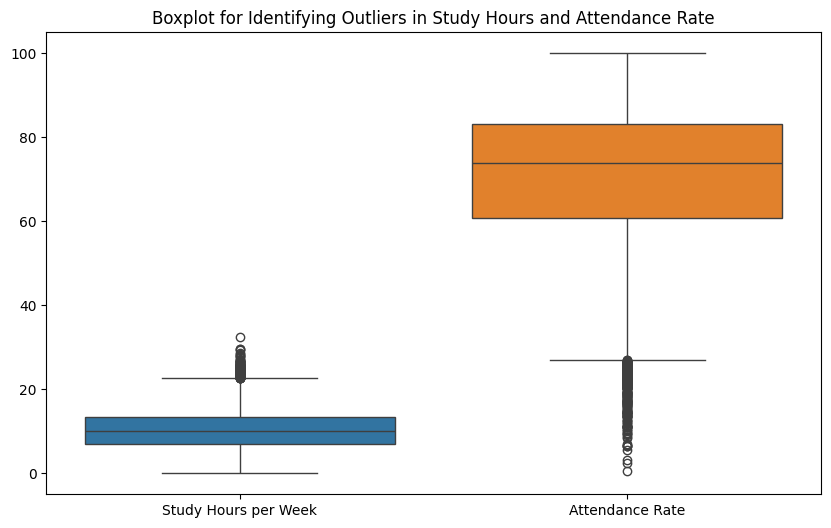

In [8]:
# Define a function to plot the distribution of 'Previous Grades' with respect to 'Passed'
def plot_previous_grades_distribution(passed="Yes"):
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df_cleaned[df_cleaned["Passed"] == passed],
        x="Previous Grades",
        kde=True,
        bins=30,
        stat="density",
    )
    plt.title(f"Distribution of Previous Grades for Passed = {passed}")
    plt.show()


# Define a function to plot the impact of 'Parent Education Level' on passing rates
def plot_parent_education_impact(passed="Yes"):
    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=df_cleaned[df_cleaned["Passed"] == passed], x="Parent Education Level"
    )
    plt.title(f"Impact of Parent Education Level on Passing for Passed = {passed}")
    plt.show()


# Define a function to plot the interaction between 'Attendance Rate' and 'Previous Grades' vs 'Passed'
def plot_interaction(
    attendance_min=0, attendance_max=100, grades_min=1, grades_max=100
):
    filtered_df = df_cleaned[
        (df_cleaned["Attendance Rate"] >= attendance_min)
        & (df_cleaned["Attendance Rate"] <= attendance_max)
        & (df_cleaned["Previous Grades"] >= grades_min)
        & (df_cleaned["Previous Grades"] <= grades_max)
    ]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=filtered_df,
        x="Attendance Rate",
        y="Previous Grades",
        hue="Passed",
        style="Passed",
    )
    plt.title(
        f"Interaction Between Attendance Rate ({attendance_min}-{attendance_max}) and Previous Grades ({grades_min}-{grades_max})"
    )
    plt.xlabel("Attendance Rate")
    plt.ylabel("Previous Grades")
    plt.show()


# Count the number of students who passed or failed in each category
pass_fail_counts = (
    df_cleaned.groupby(["Parent Education Level", "Passed"])
    .size()
    .unstack(fill_value=0)
)
print(pass_fail_counts)

# Interact with the plots
interact(plot_previous_grades_distribution, passed=["Yes", "No"])
interact(plot_parent_education_impact, passed=["Yes", "No"])
interact(
    plot_interaction, attendance_min=0, attendance_max=100, grades_min=0, grades_max=100
)

# Boxplot to identify outliers in 'Study Hours per Week' and 'Attendance Rate'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[["Study Hours per Week", "Attendance Rate"]])
plt.title("Boxplot for Identifying Outliers in Study Hours and Attendance Rate")
plt.show()

In [9]:
def remove_outliers(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define acceptable range as Q1 - 1.5*IQR to Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows that are outside of this range
    filtered_df = df[
        (df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)
    ]
    return filtered_df


# Remove outliers for 'Study Hours per Week' and 'Attendance Rate'
df_no_outliers = remove_outliers(df_cleaned, "Study Hours per Week")
df_no_outliers = remove_outliers(df_no_outliers, "Attendance Rate")

# Display the new dataset summary after outlier removal
df_no_outliers.describe()

,Study Hours per Week,Attendance Rate,Previous Grades,Study_Hours_Attendance,Study_Hours_Squared,Attendance_Squared
count,34127.000000,34127.00000,34127.000000,34127.000000,34127.000000,34127.000000
mean,10.164294,71.66752,64.728052,728.635751,123.491869,5383.986987
std,4.492169,15.74042,14.141670,366.111558,97.626420,2178.829435
min,-0.000000,27.00000,8.300000,-0.000000,0.000000,729.000000
25%,7.000000,61.10000,55.500000,461.215000,49.000000,3733.210000
50%,9.962744,74.00000,65.440107,698.710000,99.256275,5476.000000
75%,13.200000,83.30000,74.200000,952.375000,174.240000,6938.890000
max,22.700000,100.00000,100.000000,2221.580000,515.290000,10000.000000


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler

new_df = pd.get_dummies(
    df_no_outliers, columns=["Parent Education Level"], drop_first=True
)

# Encode categorical columns
label_encoder = LabelEncoder()
new_df["Passed"] = label_encoder.fit_transform(new_df["Passed"])
new_df["Participation in Extracurricular Activities"] = label_encoder.fit_transform(
    new_df["Participation in Extracurricular Activities"]
)

In [11]:
# Convert boolean columns to integers (0 and 1)
new_df["Parent Education Level_Bachelor"] = new_df[
    "Parent Education Level_Bachelor"
].astype(int)
new_df["Parent Education Level_Doctorate"] = new_df[
    "Parent Education Level_Doctorate"
].astype(int)
new_df["Parent Education Level_High School"] = new_df[
    "Parent Education Level_High School"
].astype(int)
new_df["Parent Education Level_Master"] = new_df[
    "Parent Education Level_Master"
].astype(int)

In [12]:
new_df.head()

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Passed,Study_Hours_Attendance,Study_Hours_Bin,Attendance_Bin,Study_Hours_Squared,Attendance_Squared,Parent Education Level_Bachelor,Parent Education Level_Doctorate,Parent Education Level_High School,Parent Education Level_Master
0,12.5,75.276323,75.0,1,1,940.954043,Medium,Medium,156.25,5666.524865,0,0,0,1
1,9.3,95.300000,60.6,0,0,886.290000,Medium,High,86.49,9082.090000,0,0,1,0
2,13.2,75.276323,64.0,0,0,993.647469,Medium,Medium,174.24,5666.524865,0,0,0,0
3,17.6,76.800000,62.4,1,0,1351.680000,High,Medium,309.76,5898.240000,1,0,0,0
4,8.8,89.300000,72.7,0,0,785.840000,Medium,High,77.44,7974.490000,0,0,0,1


In [13]:
# Map the bins to numerical values
bin_mapping = {"Low": 1, "Medium": 2, "High": 3}

new_df["Study_Hours_Bin"] = new_df["Study_Hours_Bin"].map(bin_mapping)
new_df["Attendance_Bin"] = new_df["Attendance_Bin"].map(bin_mapping)

# Verify the mapping
new_df[["Study_Hours_Bin", "Attendance_Bin"]].head()

,Study_Hours_Bin,Attendance_Bin
0,2,2
1,2,3
2,2,2
3,3,2
4,2,3


In [14]:
new_df.head()

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Passed,Study_Hours_Attendance,Study_Hours_Bin,Attendance_Bin,Study_Hours_Squared,Attendance_Squared,Parent Education Level_Bachelor,Parent Education Level_Doctorate,Parent Education Level_High School,Parent Education Level_Master
0,12.5,75.276323,75.0,1,1,940.954043,2,2,156.25,5666.524865,0,0,0,1
1,9.3,95.300000,60.6,0,0,886.290000,2,3,86.49,9082.090000,0,0,1,0
2,13.2,75.276323,64.0,0,0,993.647469,2,2,174.24,5666.524865,0,0,0,0
3,17.6,76.800000,62.4,1,0,1351.680000,3,2,309.76,5898.240000,1,0,0,0
4,8.8,89.300000,72.7,0,0,785.840000,2,3,77.44,7974.490000,0,0,0,1


In [18]:
# Select features and target variable
X = new_df[
    [
        "Study Hours per Week",
        "Attendance Rate",
        "Previous Grades",
        "Study_Hours_Bin",
        "Attendance_Bin",
        "Participation in Extracurricular Activities",
    ]
    + [col for col in new_df.columns if col.startswith("Parent Education Level_")]
]
y = new_df["Passed"]

# Split the data into training and test sets with a 40-60 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, train_size=0.75, random_state=42, stratify=y
)

# Display the shape of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25595, 10), (8532, 10), (25595,), (8532,))

In [19]:
X_test

,Study Hours per Week,Attendance Rate,Previous Grades,Study_Hours_Bin,Attendance_Bin,Participation in Extracurricular Activities,Parent Education Level_Bachelor,Parent Education Level_Doctorate,Parent Education Level_High School,Parent Education Level_Master
14727,11.8,93.6,53.900000,2,3,1,0,0,1,0
32261,14.9,90.3,87.100000,2,3,1,0,1,0,0
22393,7.7,80.2,44.100000,2,3,0,1,0,0,0
33815,10.3,60.7,72.100000,2,2,1,0,1,0,0
13622,13.0,78.2,57.300000,2,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
11080,14.4,98.7,83.800000,2,3,0,1,0,0,0
6087,2.3,76.9,45.500000,1,2,1,0,1,0,0
13310,7.1,73.6,58.700000,2,2,1,1,0,0,0
14132,16.8,85.5,65.440107,3,3,1,1,0,0,0
